# TA Review Session
## Linear Algebra, Regression and Data Analysis in Python
### FINM September Launch

Maneet Singh - TA

maneetsingh@uchicago.edu

## OLS Review

- Most problems in finance can be defined as a linear function of certain variables


- Ordinary Least Squares or OLS models are the most commonly used methods to identify these linear relationships


- Gauss-Markov Theorem allows the use of OLS in various problems even if some of the assumptions of theorem do not hold in the sample


<br>

**OLS Model Review**

Let $Y$ be a variable dependent on a set of variables $X$ such that the following linear relationship holds in the population:

$$
Y = X'\beta + \epsilon
$$

From an observed sample of data $y$ and $x$, we estimate the following:

$$
y = x'b + e
$$

where $b$ is given by:

$$
b = (x'x)^{-1}x'y
$$


As sample size $\rightarrow \infty$, $b \rightarrow \beta$ if the classical assumptions of OLS hold true. (by which property?)

<br>

**Note**: For the fitted values, $\hat{y} = x'b = x'(x'x)^{-1}x'y$

- OLS regression is also defined as the projection of $y$ $(\hat{y})$ on the vector space spanned by $x$.
- $x'(x'x)^{-1}x'$ is often refered to as the *projection matrix* as it projects any variable onto the vector space spanned by $x$.



<br>

Today, we will discuss:


- How to develop a regression model in python using statsmodels and scikit-learn


- Classical Assumptions of OLS


- Statistical tests for these assumptions

<br>

**Data**

This problem utilizes the data in *../data/multi_asset_etf_data.xlsx*

- Return data on various asset classes

- This data comes via ETFs, which will be discussed in the Markets series

The dataset can be found here: https://github.com/MarkHendricks/finm-data-analysis-2022/blob/main/data/multi_asset_etf_data.xlsx


### 1. Constructing an OLS model and Classical Inference

In [16]:
## Start by importing the libraries and the dataset in the notebook

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('multi_asset_etf_data.xlsx', sheet_name=2).set_index('Date')
data.index = pd.to_datetime(data.index)
display(data.head())

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008440,-0.001553,0.155029,0.114637,0.137907,-0.028005,0.295598,0.229649,0.022329,0.098793,-0.018504
2009-05-31,0.054144,0.163134,0.159872,0.132390,0.029027,-0.020301,0.023199,0.054364,0.028337,0.058925,0.020438
2009-06-30,0.004549,-0.026858,-0.023094,-0.014649,0.032918,-0.006171,-0.025462,0.044849,-0.004036,-0.001255,0.001383
2009-07-31,0.031312,0.018595,0.110173,0.100443,0.069218,0.008344,0.105827,0.143274,0.015353,0.074633,0.000907
2009-08-31,0.007192,-0.040800,-0.013572,0.044595,-0.017405,0.007198,0.131503,0.032977,-0.004587,0.036504,0.007977


Let's construct the following model, as we do in HW2:

$$
r^{SPY}_t = \alpha + \sum^{k}_{i=1}\beta^i r^i_t + \epsilon_t
$$

In [14]:
## Using scikit-learn

y = data[['SPY']]
X = data.drop('SPY', axis = 1)
ols_model = LinearRegression().fit(X, y)
betas = ols_model.coef_

## Using statsmodels

y = data[['SPY']]
X = sm.add_constant(data.drop('SPY', axis = 1))
display(X.head())

ols_model = sm.OLS(endog = y, exog = X).fit()
print(ols_model.summary())

,const,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,TIP
Date,,,,,,,,,,,
2009-04-30,1.0,0.008440,-0.001553,0.155029,0.114637,0.137907,-0.028005,0.295598,0.229649,0.022329,-0.018504
2009-05-31,1.0,0.054144,0.163134,0.159872,0.132390,0.029027,-0.020301,0.023199,0.054364,0.028337,0.020438
2009-06-30,1.0,0.004549,-0.026858,-0.023094,-0.014649,0.032918,-0.006171,-0.025462,0.044849,-0.004036,0.001383
2009-07-31,1.0,0.031312,0.018595,0.110173,0.100443,0.069218,0.008344,0.105827,0.143274,0.015353,0.000907
2009-08-31,1.0,0.007192,-0.040800,-0.013572,0.044595,-0.017405,0.007198,0.131503,0.032977,-0.004587,0.007977


                            OLS Regression Results                            
Dep. Variable:                    SPY   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     107.0
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           2.85e-62
Time:                        07:43:08   Log-Likelihood:                 446.62
No. Observations:                 158   AIC:                            -871.2
Df Residuals:                     147   BIC:                            -837.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0059      0.001      4.599      0.0

### Classical Inference

#### What is the significance of $\alpha$? When do you expect $\alpha = 0$.

#### What can you conclude about the t-stat of $\beta_{DBC}$? What about $\beta_{EEM}$

##### What can you conclude from the regression $R^2$

#### What can you conclude from the F-statistic of the regression?

#### Why are OLS estimates called BLUE?

### 2. Assumptions of Classical OLS 

#### 1. No Multicollinearity or Full-Rank of regressors

- Multicollinearity is a situation where there is a very high inter-correlation between the predictor variables in a regression setup

- It can make the choosing of the correct set of predictor variables for the model more difficult.

- It makes it difficult to interpret the precise effect of each predictor.

- Although multicollinearity does not affect the overall fit of the model and the parameter estimates under multicollinearity are still unbiased, these parameter estimates are now inefficient and not BLUE anymore.

**Visual Inspection of Multicollinearity: Correlation Heatmap**

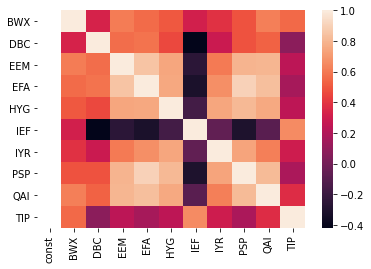

In [22]:
sns.heatmap(X.corr()[1:])
plt.show()

**Variance Inflation Factor**

- The Variance Inflation Factor (VIF) measures for how much multicollinearity exists in a regression model. 

- Essentially, it measures for how much regression coefficients are affected by other independent variables in the model. 

- Higher values of Variance Inflation Factor (VIF) are associated with multicollinearity. The generally accepted cut-off for VIF is 4, with higher values denoting levels of multicollinearity that could negatively impact the regression model.


VIF is calculated as:

$$
VIF_i = \frac{1}{1 - R_i^2}
$$

Where $R_i^2$ is the regression R-squared for $i^{th}$ factor regressed on all other factors:

$$
x_i = \alpha + \beta_1x_1 + \beta_1x_2 + ... + \beta_{i-1}x_{i-1} + \beta_{i+1}x_{i+1} + ... \beta_{n}x_{n} + \epsilon
$$

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
display(pd.DataFrame([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], \
                     index=X.columns, columns=['VIF']))

,VIF
const,1.169485
BWX,3.004313
DBC,2.187467
EEM,4.976257
EFA,9.216706
HYG,4.089439
IEF,4.600986
IYR,2.939911
PSP,8.883728
QAI,5.096824


Clearly, multicollinearity is a problem in this model

#### 2.  Homoscedasticity of residuals

- Homoskedastic (also spelled "homoscedastic") refers to a condition in which the variance of the residual, or error term, in a regression model is constant. 

- That is, the error term does not vary much as the value of the predictor variable changes.

**Visual Inspection of Homoscedasticity: Scatterplot for fitted value vs residuals**

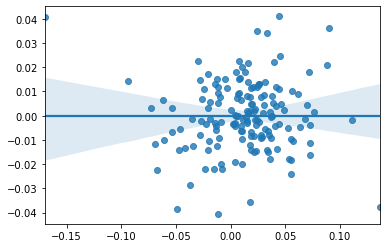

In [42]:
residuals = ols_model.resid
fitted = ols_model.fittedvalues

sns.regplot(x = fitted, y = residuals)
plt.show()

To visually inspect heteroscedasticity first, we use a scatter plot between fitted values of the model and the residuals of the model. If heteroscedasticity exists, you will see a cone-shaped pattern in the scatterplot (Variance in residuals will be more on one side i.e. the points will be further away from one another and variance will be less on the other side i.e. the points will be closer to one another.

In this case, we see a slight cone-shaped pattern where the variance in residuals is higher when the fitted values are small and the variance in residuals is lower when the fitted values are large. This indicates heteroscedasticity in the sample.


**Breusch–Pagan (BP) test**

Suppose that we estimate the regression model

$$y=\beta _{0} + \beta _{1}x + u$$

If the assumption is not held to be true, a simple model might be that the variance is linearly related to independent variables. Such a model can be examined by regressing the squared residuals on the independent variables, using an auxiliary regression equation of the form

$$\widehat {u}^{2} = \gamma _{0} + \gamma _{1}x + v$$

Hypothesis Statement:

$H_0:$ Residual Variances are Constant

$H_A:$ Residual Variances are not Constant

In [44]:
from statsmodels.stats.diagnostic import het_breuschpagan
lm, pval, _, _ = het_breuschpagan(residuals,X)
print(f'BP-test for Heteroskedasticity statistic is {lm:.4f}')
print(f'BP-test for Heteroskedasticity p-value is {pval:.4%}')

BP-test for Heteroskedasticity statistic is 16.4565
BP-test for Heteroskedasticity p-value is 8.7290%


**White's Test**

White test is a stricter test for Homoscedasticity as it tests for non-linear relationships as well, particularly the quadratic form.

$$
\widehat {u}^{2} = \gamma _{0} + \gamma_{1}\hat{y} + \gamma_{2}\widehat{y}^{2} + v
$$

Hypothesis Statement:

$H_0:$ Residual Variances are Constant

$H_A:$ Residual Variances are not Constant

In [39]:
from statsmodels.stats.diagnostic import het_white
lm, pval, _, _ = het_white(residuals,X)
print(f'White-test for Heteroskedasticity statistic is {lm:.4f}')
print(f'White-test for Heteroskedasticity p-value is {pval:.4%}')

White-test for Heteroskedasticity statistic is 89.2490
White-test for Heteroskedasticity p-value is 2.4703%


#### 3.  No Autocorrelation of residuals

Serial correlation (also called Autocorrelation) is where error terms in a time series transfer from one period to another. This leads to:

- **Inefficient Ordinary Least Squares Estimates** and any forecast based on those estimates. An efficient estimator gives you the most information about a sample; inefficient estimators can perform well, but require much larger sample sizes to do so.

- **Exaggerated goodness of fit** (for a time series with positive serial correlation and an independent variable that grows over time).

- **Standard errors that are too small** (for a time series with positive serial correlation and an independent variable that grows over time).

- **False positives** for significant regression coefficients. In other words, a regression coefficient appears to be statistically significant when it is not.

**Visual Inspection of Autocorrelation: ACF for residuals**

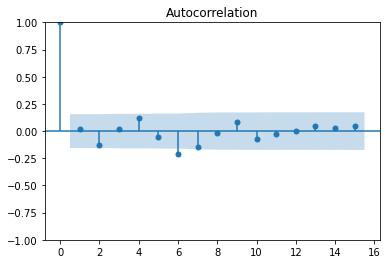

In [68]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags = 15, title = 'Autocorrelation')
plt.show()

**Durbin-Watson (DW) Test**

- The Durbin Watson Test is a measure of autocorrelation (also called serial correlation) in residuals from regression analysis.


- The Durbin Watson test reports a test statistic, with a value from 0 to 4, where:

    * 2 is no autocorrelation.
    * 0 to 2 is positive autocorrelation (common in time series data).
    * 2 to 4 is negative autocorrelation (less common in time series data).


In [31]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
dw_stats = durbin_watson(residuals)

print('Durbin Watson Test Statistic: {:,.2f}'.format(dw_stats))

Durbin Watson Test Statistic: 1.92


#### 4.  Normality of residuals

- Normality is the assumption that the underlying residuals are normally distributed, or approximately so.


- Violation of the normality assumption only becomes an issue with small sample sizes. F-test and t-test which are required for classical inference assume normality of errors


- For large sample sizes, the assumption is less important due to the central limit theorem, and the fact that the F- and t-tests used for hypothesis tests and forming confidence intervals are quite robust to modest departures from normality.

**Visual Inspection of Normality: Density Plots and Q-Q plots**

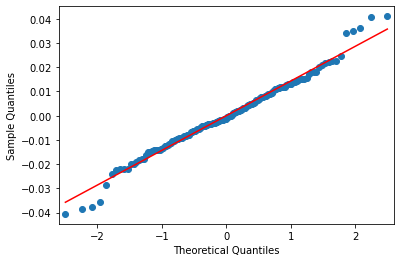

In [75]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line = "s")
plt.show()

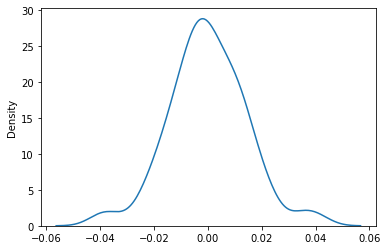

In [70]:
sns.kdeplot(residuals)
plt.show()

**KS Test** 

In [76]:
from statsmodels.stats.diagnostic import kstest_normal

In [77]:
lm, pval = kstest_normal(residuals)
print(f'KS-test for normality statistic is {lm:.4f}')
print(f'KS-test for normality p-value is {pval:.4%}')

KS-test for normality statistic is 0.0400
KS-test for normality p-value is 82.8209%


**Other tests for normality**

In [78]:
## Jarque Bera Test
lm, p_val, _, _ = jarque_bera(residuals)
print(f'JB-test for normality statistic is {lm:.4f}')
print(f'JB-test for normality p-value is {p_val:.4%}')

JB-test for normality statistic is 3.9018
JB-test for normality p-value is 14.2149%


In [79]:
## Anderson-Darling Test

lm, pval = normal_ad(residuals)
print(f'AD-test for normality statistic is {lm:.4f}')
print(f'AD-test for normality p-value is {pval:.4%}')

AD-test for normality statistic is 0.4842
AD-test for normality p-value is 22.5220%


## Practice Questions for Interview

#### 1. Suppose you run the following two regressions: 

$$y = \beta_1 x_1 + \epsilon_1$$ 

$$y = \hat{\beta_1}x_1 + \hat{\beta_2} x_2 + \epsilon_2$$

  When does $\beta_1 = \hat{\beta_1}$?

#### 2. Suppose you increase the sample size of your data by exact replication (You append a copy of the original data). Which of the following quantities you expect to change: i) model coefficients ( $\beta$ ), ii) model R-squared, iii) coefficient t-stats?

#### 3. Can R-squared meteric be negative? What about Adjusted R-Squared?

#### 4. When are OLS estimators called BLUE?

#### 5. Consider the following linear models:

$$
y_1 = \beta_1 x_1 + \epsilon
$$

$$
y_2 = \gamma_1 z_1 + \gamma_2 z_2 + \mu
$$

The model for $y_1$ has an $R^2 = 64\%$ and the model for $y_2$ has an $R^2 = 81\%$. What can you say about the following?

- Relationship between $y_1$ and $x_1$


- Relationship between $y_2$ and $z_1$


- Relationship between $y_2$ and $z_2$


- Relationship between $y_2$ and $\hat{y_2}$